## Zehui Wang - Mahcine Learning HW4  ##
## Part 1: Build a classification model using text data  ##

In part one of the homework, you will solve a text classification task.

You can download the following data-sets: HW4_Text_train_data.csv and HW4_text_test_data.csv

The data consists of Women’s fashion online shop reviews, consisting of a review
text, and whether the review author would recommend the product. We are trying to determine whether a reviewer will recommend a product or not based on each review. In a real application this might allow us to find out what is good or bad about certain products or to feature more typical reviews (like a very critical and a very positive one).

1) Use cross-validation to evaluate the results. 2) Use a metric that’s appropriate for imbalanced classification (AUC or average precision for example), and 3) inspect all models by visualizing the coefficients. To complete part one of the homework do the following: 

##### 1) Import the text data, 

##### 2) vectorize the review column into an X matrix.  

##### 3) Then run at least three models and select a single best model.  Note that you can also create three models that simply use different types of explanatory variables such as a logistic regression with different n grams or different tokenizers.  

##### 4) Be sure to explain your choice and evaluate this model using the test set.


### Step 1: Import my training set and testing set

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

dftrain = pd.read_csv("/Users/wangzehui/Desktop/Machine Learning HW#4/HW4_Text_train_data.csv", sep=',')
dftrain.head(10)

,Review,Recommended
0,"""go to"" please offer a maxi for mature custome...",1
1,"""go to"" tee for sz 10+ women.Women who want so...",1
2,"""long and warm"".These leg warmers are perfect ...",1
3,"""tweed"" dress.I bought this dress for my siste...",1
4,#1 stunna.I am in lust with this fabulous dres...,1
5,(mostly) good.I have a curvy figure and have a...,1
6,***please restock size 32 in other washes***.T...,1
7,**great for broad shouldered women**.After rea...,1
8,*another* grey cardigan? oh yes....I have too ...,1
9,".$20 for super comfy, warm leggings. bought tw...",1


In [2]:
dftrain['Recommended'].value_counts()

1    13910
0     3075
Name: Recommended, dtype: int64

In [3]:
dftest = pd.read_csv("/Users/wangzehui/Desktop/Machine Learning HW#4/HW4_Text_test_data.csv", sep=',')
dftest.head(10)

,Review,Recommended
0,"""beach business"".Great for the beachy business...",1
1,"""formal pajamas"".These are super comfy and so ...",1
2,"""perfect with jeans"".Great with leggings.perfe...",1
3,"""won't stretch"" tags are misleading.The tag on...",1
4,$200 piece of polyester.A $200 piece of polyes...,0
5,**love**.So glad i was able to snag these kill...,1
6,.#childsize. not sure where this went wrong bu...,0
7,... just not for me....I was very excited to t...,1
8,".A bit wide in the torso, but the detail at th...",1
9,".A little thin, but overall very cute. i like ...",1


In [4]:
dftest['Recommended'].value_counts()

1    4631
0    1026
Name: Recommended, dtype: int64

In [5]:
# I decide to make them a whole dataset in order to give more flexibility in the train_test_split
df = pd.concat([dftrain, dftest])
df['Recommended'].value_counts()

1    18541
0     4101
Name: Recommended, dtype: int64

In [6]:
df.head(10)

,Review,Recommended
0,"""go to"" please offer a maxi for mature custome...",1
1,"""go to"" tee for sz 10+ women.Women who want so...",1
2,"""long and warm"".These leg warmers are perfect ...",1
3,"""tweed"" dress.I bought this dress for my siste...",1
4,#1 stunna.I am in lust with this fabulous dres...,1
5,(mostly) good.I have a curvy figure and have a...,1
6,***please restock size 32 in other washes***.T...,1
7,**great for broad shouldered women**.After rea...,1
8,*another* grey cardigan? oh yes....I have too ...,1
9,".$20 for super comfy, warm leggings. bought tw...",1


### Step 2: Vectorize the review column into an X matrix ###

In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

text_train = df['Review']
vect = CountVectorizer(min_df=1).fit(text_train)
X = vect.transform(text_train)
print("X:\n{}".format(repr(X)))

X:
<22642x14679 sparse matrix of type '<class 'numpy.int64'>'
	with 999907 stored elements in Compressed Sparse Row format>


In [8]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 14679
First 20 features:
['00', '000', '00p', '02', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0verall', '0xs', '10', '100', '1000', '100lb', '100lbs']
Features 210 to 230:
['18th', '19', '190', '190lbs', '1920', '1920s', '1930', '1940', '1940s', '1950', '1950s', '195lbs', '1960s', '1970', '1970s', '1973', '198', '1980s', '1982', '1987']
Every 200th feature:
['00', '174', '39ish', 'accented', 'ags', 'annoy', 'ashamed', 'badass', 'beginnings', 'blisters', 'bracelet', 'bunching', 'carol', 'chelan', 'clip', 'compareed', 'contri', 'creations', 'dangly', 'depends', 'discern', 'dr4ess', 'eclectic', 'enroute', 'exoected', 'fauves', 'flashbacks', 'forest', 'galore', 'goner', 'hahaha', 'hepburn', 'how', 'improved', 'interfacing', 'jiggles', 'labelled', 'lenox', 'longs', 'mailbox', 'measly', 'mirrors', 'multiple', 'nhl', 'occurrence', 'outerwear', 'parachute', 'personalities', 'player', 'powering', 'proportionate', 'rags', 'reflex', 'resolutions', 'rocked

### Step 3: Then run at least three models and select a single best model. 

Note that you can also create three models that simply use different types of explanatory variables such as a logistic regression with different n grams or different tokenizers. Be sure to explain your choice and evaluate this model using the test set.

In [9]:
# First i set y = recomended, this never changes throughout my analysis

X = X
y = np.array(df['Recommended'])

print(X.shape)
print(y.shape)

(22642, 14679)
(22642,)


### Linear Regession

From the linear regression result below, the Test score is -0.76. We are able to see that it is not a good model for sentiment classification.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

print(X_train.shape)
print(y_train.shape)

(20377, 14679)
(20377,)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
#..attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 0.00287246  0.0089697  -0.01915013 ... -0.13992299 -0.00180233
  0.33570786]
lr.intercept_: 0.8191924762329325
Training set score: 0.82
Test set score: -0.76


### Logistic Regression with GridSearchCV & Cross Validation & min_df=1, the base case

X: <22642x14679 sparse matrix of type '<class 'numpy.int64'>'

Best cross-validation score: 0.90

Best parameters:  {'C': 0.5}

This model has pretty high scores.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

vect = CountVectorizer(min_df=1).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("X:\n{}".format(repr(X)))

param_grid = {'C': [ 0.5 , 0.6]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

X:
<22642x14679 sparse matrix of type '<class 'numpy.int64'>'
	with 999907 stored elements in Compressed Sparse Row format>


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.90
Best parameters:  {'C': 0.5}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# helper function to plot top positive and negative coefficients

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


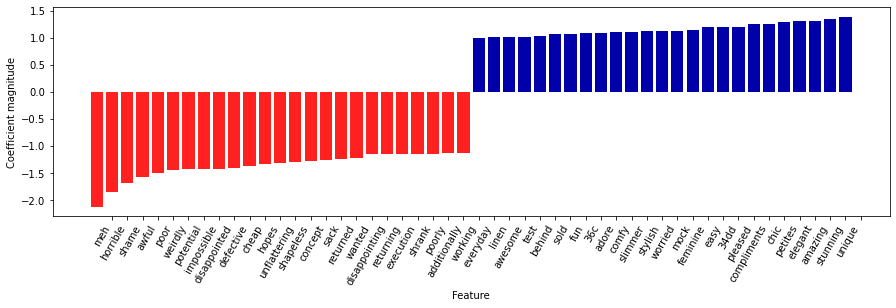

In [14]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=0.5).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

### Logistic Regression with GridSearchCV & min_df=1000

X with min_df=1000: <20377x189 sparse matrix of type '<class 'numpy.int64'>'

est cross-validation score: 0.87

Best parameters:  {'C': 0.3}

Since I want to shrink the size of X, I chose min_df = 1000.

In [15]:
vect = CountVectorizer(min_df=1000).fit(text_train)
X = vect.transform(text_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X with min_df: {}".format(repr(X_train)))

X with min_df: <20377x189 sparse matrix of type '<class 'numpy.int64'>'
	with 561714 stored elements in Compressed Sparse Row format>


In [16]:
param_grid = {'C': [ 0.01 ,0.05 ,0.1,0.3 ]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=15)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.87
Best parameters:  {'C': 0.3}


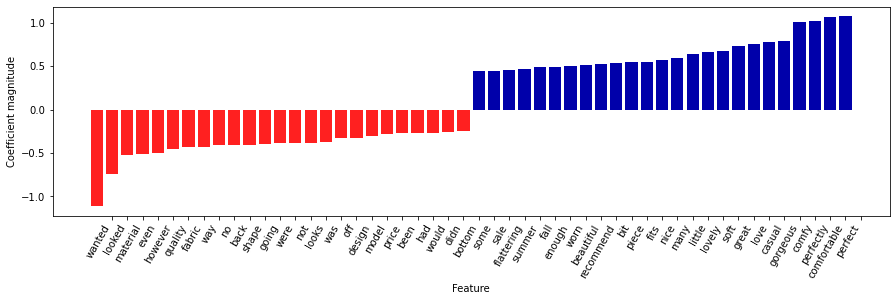

In [17]:
coefs = LogisticRegression(C=0.3).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()

visualize_coefficients(coefs, feature_names, n_top_features=25)

### Logistic Regression with GridSearchCV & min_df=1200 & StopWords

X with stop words: <20377x87 sparse matrix of type '<class 'numpy.int64'>'

Best cross-validation score: 0.85

Best parameters:  {'C': 0.6}

I chose to use stop words and set min_df = 1200, and therefore the X shrinks to 87 columns. Best cross-validation score is 0.85, which is lower than the above models.

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['amongst', 'meanwhile', 'very', 'through', 'your', 'twenty', 'fifty', 'third', 'system', 'him', 'well', 'ever', 'a', 'across', 'what', 'ltd', 'himself', 'mill', 'these', 'its', 'bill', 'whom', 'former', 'who', 'on', 'herself', 'everything', 'those', 'upon', 'part', 'whoever', 'eg']


In [19]:
vect = CountVectorizer(min_df=1000, stop_words="english").fit(text_train)
X = vect.transform(text_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("X with stop words:\n{}".format(repr(X_train)))

X with stop words:
<20377x106 sparse matrix of type '<class 'numpy.int64'>'
	with 212802 stored elements in Compressed Sparse Row format>


In [20]:
param_grid = {'C': [ 0.3, 0.6,0.8]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.85
Best parameters:  {'C': 0.6}


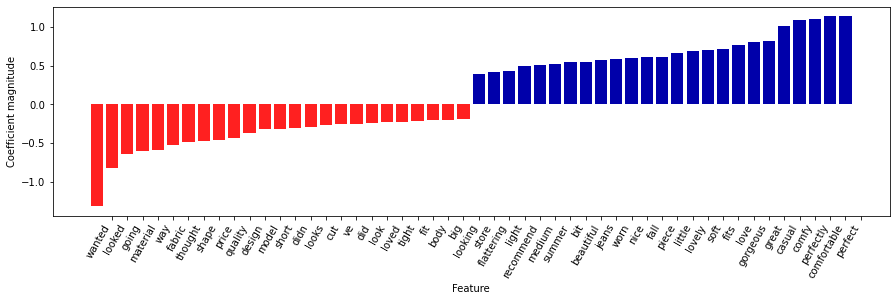

In [21]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=0.6).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

### Logistic Regression with Cross-Validation & GridSearchCV & min_df=1000 & TFIDF

X with Tfidf, min_df=1000: <20377x189 sparse matrix of type '<class 'numpy.float64'>'

Best cross-validation score: 0.87

Best parameters:  {'C': 10}

With this model, we are able to see that the TFIDF actaully improves the score a little bit than the Stop words.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=1000, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("X with Tfidf, min_df=1000: {}".format(repr(X_train)))

param_grid = {'C': [ 1, 5, 8]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

X with Tfidf, min_df=1000: <20377x189 sparse matrix of type '<class 'numpy.float64'>'
	with 561714 stored elements in Compressed Sparse Row format>
Best cross-validation score: 0.87
Best parameters:  {'C': 5}


In [23]:
grid.best_estimator_

LogisticRegression(C=5)

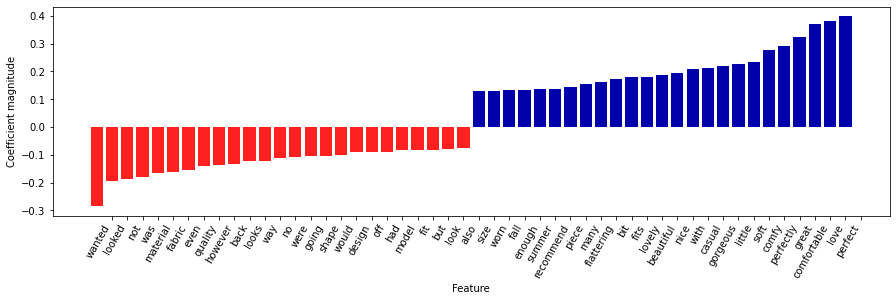

In [24]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=10).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

### Logistic Regression with Cross-Validation & GridSearchCV & min_df=800 & use bi-gram & Tfidf

X with Tfidf, min_df=800, 2-GRAM: <20377x88 sparse matrix of type '<class 'numpy.float64'>'
	
Best cross-validation score: 0.82

Best parameters: {'C': 0.05}

From this logistic regression model, we are albe to see that when we use bi-gram, the cross-validation score is 0.82 and the parameter we choose is C=0.05.

In [25]:
vect = TfidfVectorizer(ngram_range=(2,2) ,min_df=800, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("X with Tfidf, min_df=800, 2-GRAM: {}".format(repr(X_train)))

param_grid = {'C': [0.04, 0.05, 0.07]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

X with Tfidf, min_df=800, 2-GRAM: <20377x88 sparse matrix of type '<class 'numpy.float64'>'
	with 123889 stored elements in Compressed Sparse Row format>
Best cross-validation score: 0.82
Best parameters:
{'C': 0.05}


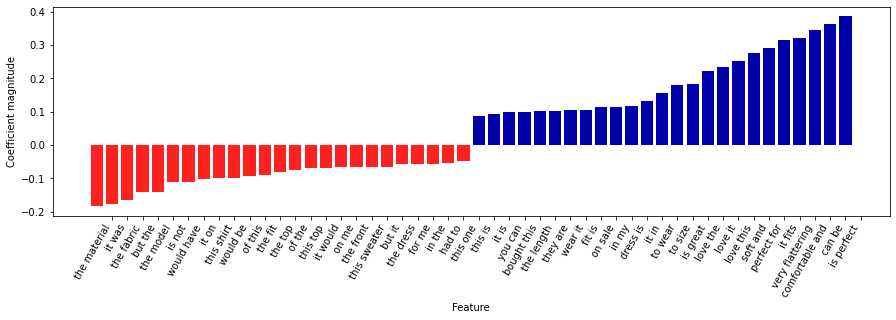

In [26]:
coefs = LogisticRegression(C=0.05).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()

visualize_coefficients(coefs, feature_names, n_top_features=25)

### Logistic Regression with Cross-Validation & GridSearchCV & min_df=800 & use 1-gram and bi-gram together & Tfidf

X with Tfidf, min_df=800, 1 Gram + 2-GRAM: <20377x330 sparse matrix of type '<class 'numpy.float64'>'
	
Best cross-validation score: 0.88

Best parameters: {'C': 0.04}

From this logistic regression model, we are albe to see that when we use ngram_range=(1,2), the cross-validation score is 0.88. This improves a lot compared to using bi-gram alone.

In [27]:
vect = TfidfVectorizer(ngram_range=(1,2) ,min_df=800, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("X with Tfidf, min_df=800, 1 Gram + 2-GRAM: {}".format(repr(X_train)))

param_grid = {'C': [0.01, 0.04, 0.05, 0.07]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

X with Tfidf, min_df=800, 1 Gram + 2-GRAM: <20377x330 sparse matrix of type '<class 'numpy.float64'>'
	with 728357 stored elements in Compressed Sparse Row format>
Best cross-validation score: 0.88
Best parameters:
{'C': 0.04}


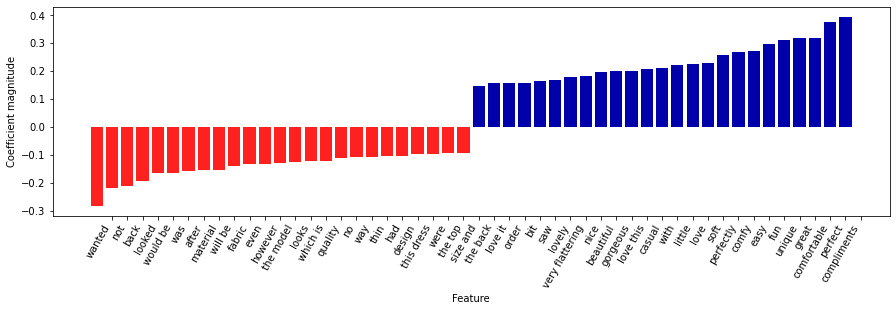

In [28]:
coefs = LogisticRegression(C=0.04).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()

visualize_coefficients(coefs, feature_names, n_top_features=25)

### Step Four: Conclusion & Best Models

After play with these models, I find "min_df" has a determining influence on the testing efficiy and scores. The smaller the "min_df", the larger the X, and therefore the slower the computer runs. In order to get result faster, I decided to set "min_df = 1000" or "min_df = 800". As long as I controlled the "min_df", i can still compare these models.

After I carefully reviewing all these models, I find that using TfidfVectorizer improves the testing score a lot, and using ngram_range=(1,2) also improves the score a lot. So, I chose two best models, the first one is my baseline mode that uses vect = CountVectorizer(min_df=1).fit(text_train), because it has the highest testing score 0.90. The second best model is vect = TfidfVectorizer(ngram_range=(1,2) ,min_df=800, norm=None).fit(text_train) because it gives the second highest score 0.88.